# Nonlocality Breaking with Respect to the CHSH Inequality and Detector Erasure Errors



In [42]:
import qnetvo as qnet
from context import utilities

from pennylane import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [118]:
erasure_dir = "../../script/data/chsh_erasure_errors/"
wn_dir = "../../script/data/chsh_white_noise_detector_errors/"

bell_data_files = utilities.get_data_files(erasure_dir, r"bell_state.*")
print("num erasure bell_state optimizations : ", len(bell_data_files))

arb_data_files = utilities.get_data_files(erasure_dir, r"arb_state.*")
print("num erasure arb_state optimizations : ", len(arb_data_files))

bell_wn_data_files = utilities.get_data_files(wn_dir, r"bell_state.*")
print("num white noise bell_state optimizations : ", len(bell_wn_data_files))

arb_wn_data_files = utilities.get_data_files(wn_dir, r"arb_state.*")
print("num white noise arb_state optimizations : ", len(arb_wn_data_files))

num erasure bell_state optimizations :  8
num erasure arb_state optimizations :  8
num white noise bell_state optimizations :  12
num white noise arb_state optimizations :  12


In [119]:
bell_data = utilities.analyze_data_two_param_scan(bell_data_files)
arb_data = utilities.analyze_data_two_param_scan(arb_data_files)

bell_wn_data = utilities.analyze_data_two_param_scan(bell_wn_data_files)
arb_wn_data = utilities.analyze_data_two_param_scan(arb_wn_data_files)

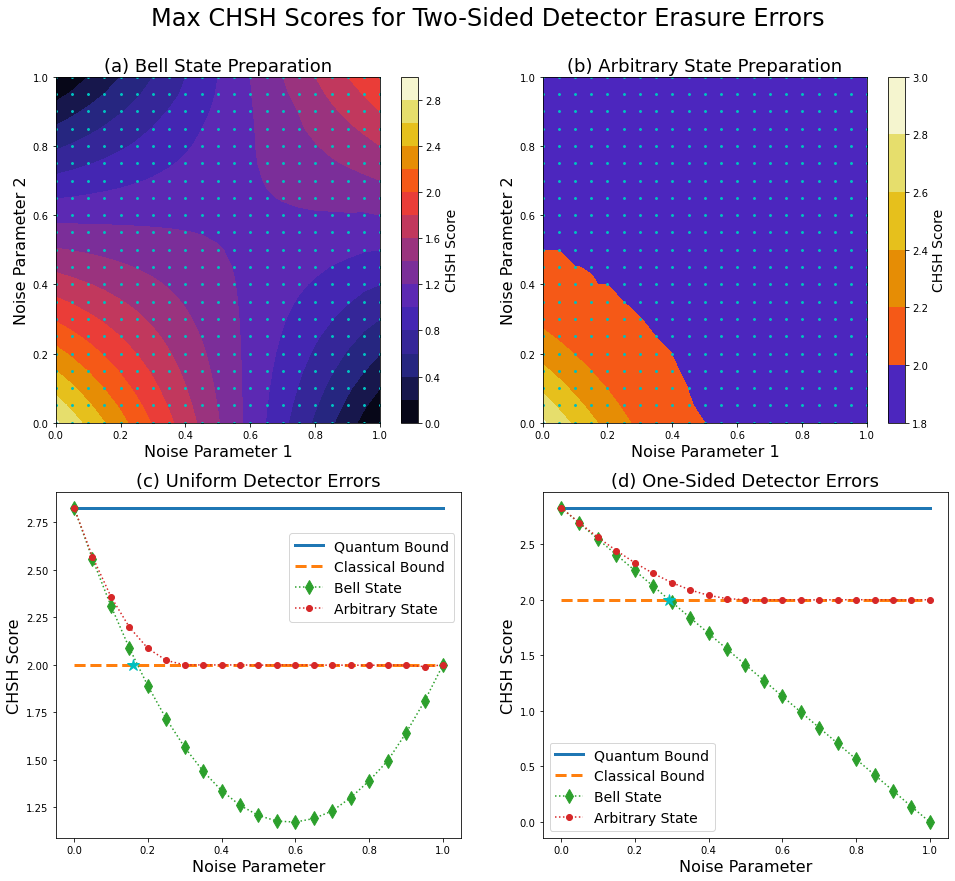

maximum difference between arbitrary and max entangled scores :  1.9999999999989502
minimum difference between arbitrary and max entangled scores :  -2.220446049250313e-15


In [99]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(16,14))

fig.suptitle("Max CHSH Scores for Two-Sided Detector Erasure Errors", size=24, y=0.95)

norm = mcolors.TwoSlopeNorm(vmin=0, vmax = 3, vcenter=2)
norm2 = mcolors.TwoSlopeNorm(vmin=1.8, vmax = 3, vcenter=2)

bell_plt = ax1.contourf(
    bell_data["x_mesh"],
    bell_data["y_mesh"],
    bell_data["max_scores"],
    levels=16,
    cmap="CMRmap",
    norm=norm
)

cbar1 = plt.colorbar(bell_plt, ax=ax1)
cbar1.set_label("CHSH Score", size=14)

# xs = np.arange(0,1-np.sqrt(2)/2,0.1)
# ys = [1-(1-np.sqrt(2)/2)/(1-x) for x in xs]
# ax1.plot(xs,ys, "c-", linewidth=2)

ax1.set_title("(a) Bell State Preparation", size=18)
ax1.set_xlabel("Noise Parameter 1", size=16)
ax1.set_ylabel("Noise Parameter 2", size=16)

ax1.scatter(bell_data["x_mesh"], bell_data["y_mesh"], color="c", marker="x", s=4)

arb_plt = ax2.contourf(
    arb_data["x_mesh"],
    arb_data["y_mesh"],
    arb_data["max_scores"],
    levels=4, #[1.8,1.9,2,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3],
    cmap="CMRmap",
    norm=norm2
)
cbar2 = plt.colorbar(arb_plt, ax=ax2)


ax2.scatter(arb_data["x_mesh"], arb_data["y_mesh"], color="c", marker="x", s=4)

cbar2.set_label("CHSH Score", size=14)

ax2.set_title("(b) Arbitrary State Preparation", size=18)
ax2.set_xlabel("Noise Parameter 1", size=16)
ax2.set_ylabel("Noise Parameter 2", size=16)

# Comparing uniform (diagonal) nosie data
arb_diag_scores = [arb_data["max_scores"][i][i] for i in range(bell_data["x_mesh"].shape[0])]
bell_diag_scores = [bell_data["max_scores"][i][i] for i in range(bell_data["x_mesh"].shape[0])]

param_range = bell_data["x_mesh"][0,:]

ax3.plot(param_range, [2*np.sqrt(2)]*len(param_range), linewidth=3, label="Quantum Bound")
ax3.plot(param_range, [2]*len(param_range), "--", linewidth=3, label="Classical Bound")
ax3.plot(param_range, bell_diag_scores, ":d", markersize=10, label="Bell State")
ax3.plot(param_range, arb_diag_scores, ":.", markersize=12, label="Arbitrary State")
ax3.legend(fontsize=14, loc="upper right", bbox_to_anchor=(1, 0.9))
ax3.set_title("(c) Uniform Detector Errors", size=18)
ax3.set_xlabel("Noise Parameter", size=16)
ax3.set_ylabel("CHSH Score", size=16)
# ax3.plot([1-np.sqrt(np.sqrt(2)/2)], [2], "c*", markersize=12)


# comparing one-sided noise data
arb_onesided_scores = [arb_data["max_scores"][0][i] for i in range(bell_data["x_mesh"].shape[0])]
bell_onesided_scores = [bell_data["max_scores"][0][i] for i in range(bell_data["x_mesh"].shape[0])]

ax4.plot(param_range, [2*np.sqrt(2)]*len(param_range), linewidth=3, label="Quantum Bound")
ax4.plot(param_range, [2]*len(param_range), "--", linewidth=3, label="Classical Bound")
ax4.plot(param_range, bell_onesided_scores, ":d", markersize=10, label="Bell State")
ax4.plot(param_range, arb_onesided_scores, ":.", markersize=12, label="Arbitrary State")
ax4.legend(fontsize=14)
ax4.set_title("(d) One-Sided Detector Errors", size=18)
ax4.set_xlabel("Noise Parameter", size=16)
ax4.set_ylabel("CHSH Score", size=16)

ax4.plot([1-np.sqrt(2)/2], [2], "c*", markersize=12)

plt.show()
print(
    "maximum difference between arbitrary and max entangled scores : ",
    max([max(diff) for diff in np.array(arb_data["max_scores"])-np.array(bell_data["max_scores"])])
)
print(
    "minimum difference between arbitrary and max entangled scores : ",
    min([min(diff) for diff in np.array(arb_data["max_scores"])-np.array(bell_data["max_scores"])])
)

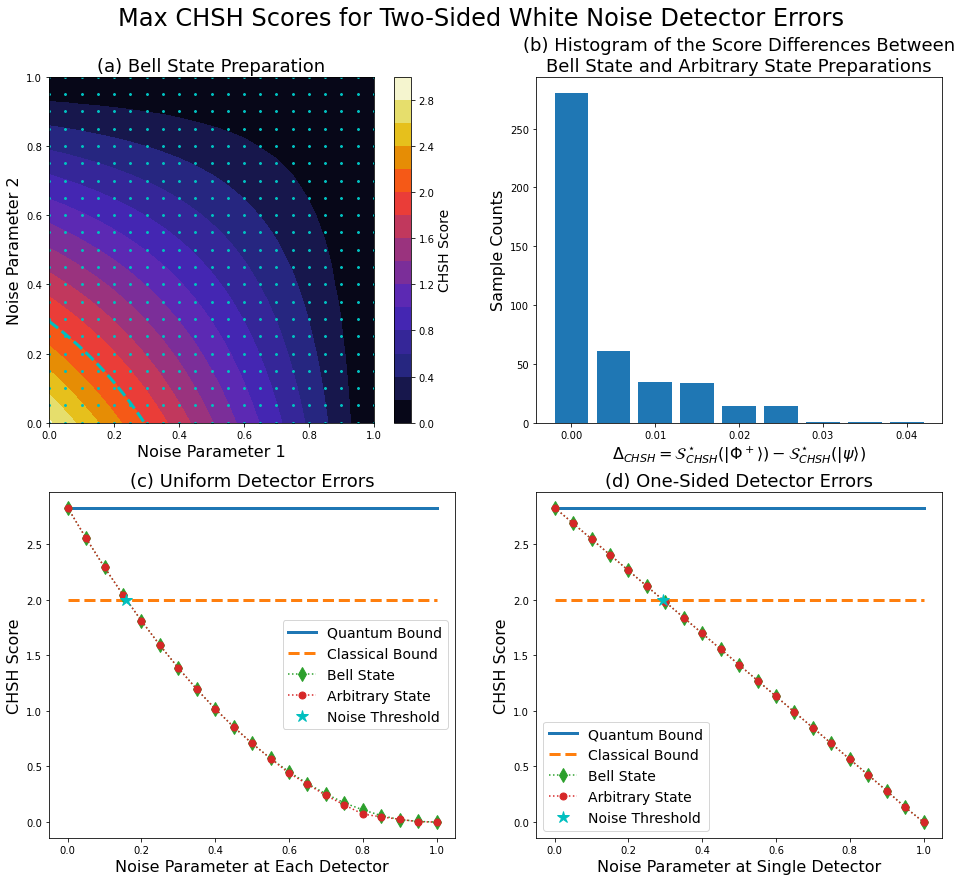

maximum difference between arbitrary and max entangled scores :  0.0022195109656082956
minimum difference between arbitrary and max entangled scores :  -0.03789189613861377


In [124]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(16,14))

fig.suptitle("Max CHSH Scores for Two-Sided White Noise Detector Errors", size=24, y=0.95)

norm = mcolors.TwoSlopeNorm(vmin=0, vmax = 3, vcenter=2)

bell_wn_plt = ax1.contourf(
    bell_wn_data["x_mesh"],
    bell_wn_data["y_mesh"],
    bell_wn_data["max_scores"],
    levels=16,
    cmap="CMRmap",
    norm=norm
)

cbar1 = plt.colorbar(bell_wn_plt, ax=ax1)
cbar1.set_label("CHSH Score", size=14)

xs = np.arange(0,(1-1/np.sqrt(2)),0.001)
ys = [(1-1/np.sqrt(2)/(1-x)) for x in xs]
ax1.plot(xs,ys, "c--", linewidth=3)

ax1.set_title("(a) Bell State Preparation", size=18)
ax1.set_xlabel("Noise Parameter 1", size=16)
ax1.set_ylabel("Noise Parameter 2", size=16)

ax1.scatter(bell_wn_data["x_mesh"], bell_wn_data["y_mesh"], color="c", marker="x", s=4)

arb_wn_max_scores = np.concatenate(arb_wn_data["max_scores"])
bell_wn_max_scores = np.concatenate(bell_wn_data["max_scores"])

max_scores_diff = bell_wn_max_scores - arb_wn_max_scores

x_ticks = np.arange(-0.0025,0.045,0.005)
hist_plt = ax2.hist(max_scores_diff, x_ticks, rwidth=0.8, label="")

ax2.set_title("(b) Histogram of the Score Differences Between\nBell State and Arbitrary State Preparations", size=18)
ax2.set_xlabel(r"$\Delta_{CHSH} = \mathcal{S}^\star_{CHSH}(|\Phi^+\rangle) - \mathcal{S}^\star_{CHSH}(|\psi\rangle)$", size=16)
ax2.set_ylabel("Sample Counts", size=16)

# Comparing uniform (diagonal) nosie data
arb_diag_scores = [arb_wn_data["max_scores"][i][i] for i in range(bell_wn_data["x_mesh"].shape[0])]
bell_diag_scores = [bell_wn_data["max_scores"][i][i] for i in range(bell_wn_data["x_mesh"].shape[0])]

param_range = bell_wn_data["x_mesh"][0,:]

ax3.plot(param_range, [2*np.sqrt(2)]*len(param_range), linewidth=3, label="Quantum Bound")
ax3.plot(param_range, [2]*len(param_range), "--", linewidth=3, label="Classical Bound")
ax3.plot(param_range, bell_diag_scores, ":d", markersize=10, label="Bell State")
ax3.plot(param_range, arb_diag_scores, ":.", markersize=14, label="Arbitrary State")

ax3.plot([1-np.sqrt(1/np.sqrt(2))], [2], "c*", markersize=12, label="Noise Threshold")

ax3.set_title("(c) Uniform Detector Errors", size=18)
ax3.set_xlabel("Noise Parameter at Each Detector", size=16)
ax3.set_ylabel("CHSH Score", size=16)
ax3.legend(fontsize=14, loc="upper right", bbox_to_anchor=(1, 0.65))


# comparing one-sided noise data
arb_wn_onesided_scores = [arb_wn_data["max_scores"][0][i] for i in range(bell_wn_data["x_mesh"].shape[0])]
bell_wn_onesided_scores = [bell_wn_data["max_scores"][0][i] for i in range(bell_wn_data["x_mesh"].shape[0])]

ax4.plot(param_range, [2*np.sqrt(2)]*len(param_range), linewidth=3, label="Quantum Bound")
ax4.plot(param_range, [2]*len(param_range), "--", linewidth=3, label="Classical Bound")
ax4.plot(param_range, bell_wn_onesided_scores, ":d", markersize=10, label="Bell State")
ax4.plot(param_range, arb_wn_onesided_scores, ":.", markersize=14, label="Arbitrary State")
ax4.plot([1-np.sqrt(2)/2], [2], "c*", markersize=12, label="Noise Threshold")

ax4.set_title("(d) One-Sided Detector Errors", size=18)
ax4.set_xlabel("Noise Parameter at Single Detector", size=16)
ax4.set_ylabel("CHSH Score", size=16)


ax4.legend(fontsize=14)


plt.show()
print(
    "maximum difference between arbitrary and max entangled scores : ",
    max([max(diff) for diff in np.array(arb_wn_data["max_scores"])-np.array(bell_wn_data["max_scores"])])
)
print(
    "minimum difference between arbitrary and max entangled scores : ",
    min([min(diff) for diff in np.array(arb_wn_data["max_scores"])-np.array(bell_wn_data["max_scores"])])
)

In [21]:
np.concatenate(arb_wn_data["max_scores"]) -np.concatenate(bell_wn_data["max_scores"])

tensor([ 1.76046808e-06,  4.89598378e-07, -2.42877110e-05,
        -1.08467734e-04, -1.50359445e-06, -2.51254974e-07,
        -9.32469849e-05, -4.76050405e-07, -9.53844894e-05,
        -3.84250761e-05, -6.57826878e-04, -2.56826921e-04,
        -9.11528678e-05, -1.99261904e-03, -4.40553480e-05,
        -3.66991146e-03, -2.37271227e-02, -1.95048220e-03,
        -8.31176662e-04,  3.00914789e-02,  0.00000000e+00,
        -8.06567394e-04,  1.14372467e-09, -3.29399374e-08,
        -2.15037637e-06, -1.68397015e-06, -2.42500018e-05,
        -2.66524058e-06, -1.14641646e-06, -2.82278188e-04,
        -7.97084452e-06, -1.27346439e-03, -1.63000501e-03,
        -1.82061111e-04, -1.44314960e-04, -2.72639712e-03,
        -7.47907842e-04, -4.85079233e-04, -8.13586810e-03,
        -1.35618212e-02, -2.33252564e-02,  0.00000000e+00,
        -5.10790756e-07, -2.56541632e-09, -1.82764178e-07,
        -2.32431427e-07, -9.13067590e-04, -1.57900534e-05,
        -2.98914282e-06, -1.80668070e-05, -9.20278019e-0

In [ ]:
bel